<h1 align=center><font size = 6>Country Restaurants distribution (for any city)
&
Correlation between inmigration and Restaurants (Toronto)</font></h1>

## Table of Contents
1. BUSINESS PROBLEM/OPPORTUNITY
    
2. REQUIRED DATA
    
3. METHOLODOGY   

4. RESULTS   
                            
5. CONCLUSIONS    

## 1. BUSINESS PROBLEM / OPPORTUNITY:

###  1.1. OBJECTIVE

Two main objectives:

1- To create a graphical tool (based on Folium) that allows for any city of the WORLD to analyze (see point 3.6 of the notebook):
- The restaurants of which nationality predominate in each area  
- The distribution of restaurants of the desired country, grouped by area.


2- Analyze correlation between inmigration and number of national restaurants in Toronto (see point 3.7 of the noteobook)

### 1.2. AUDIENCE

The groups interested in this project are among others.
- People interested in opening a national restaurant in a city. It helps them decide how the competition is distributed.
- Analyze the correlation between the national restaurants the immigrants of that country who live in that city. It can be seen that nationalities are more likely to open national restaurants. This, for example, can be used by a bank to offer to certain people from those countries facilities to open a restaurant.
- The first part of previous point can be repeated for tourism.
-  Sociologists. There are national restaurants whose importance does not seem to be correlated with immigration (entrances and exits) or tourism (entrances and exits). This happens for example with Italy, Greece or Mexico that have more restaurants than they would be due for migratory or tourist movements. This analysis is a first step to look for  what other factors influence (cultural, historical, marketing, ??) 
- Foursquare. Looking at the conclusions of this analysis could.

 	. Allow new types of searches not only by circles, but also by square or rectangle which would facilitate the management of overlaps in the areas if we need to divide the search into smaller areas for whatever reason.
    
 	. Improve the precision of the searches and when someone put in SEARCH a country name they would translate it into a category and search for it (it is the approach that I used)
    
    . This can be extrapolated to other categories of not only ‘FOOD’ where I focussed.
    
### 1.3. FUNCTIONALITIY DETAILS OFFERED BY THE TOOL

For a city choosen by name. 

- It shows the city map including.

	* The limits you decided 
	* The original “center” obtained from Geolocator.
	* One big circle used to search directly restaurants of countries that have less than 50 restaurants in the whole city.
	* City divided in small circles, within each one it shows which country has more restaurants in that area and how many. Each country is painted with a certain colour.

- You can choose any country and it will shows you how many restaurants there are in each area. Only for the 15 countries with more restaurants throughout the country. This is a constrain imposed only to save access to Foursquare, but it can be modified if needed

## 2. REQUIRED DATA. 

Basically we need 2 types of data:

- RESTAURANTS X COUNTRY. 

The restaurants of the city within the circular areas in which we divide the city. For this we will use the foursquare API (with the SEARCH endpoint), although previously we will have to homogenize the catalog of categories using the CATEGORIES endpoint. 

- INMIGRATION TOWARDS CANADA AND AN STANDARDIZED LIST OF COUNTRIES

We will contrast the analysis using 2 different datasets:
    
     - Immigrants arriving to Canada between 1980-2013 (Dataset 1)
     
     (https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx')

     - Immigrants living in Canada in 2019 (Dataset 2) 
     (https://datosmacro.expansion.com/demografia/migracion/inmigracion/canada)
     
It is necesary a standardized list of countries to match the nationalities of the restaurants and the names of the countries. 

## 3. METHODOLOGY

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

    
3.1. <a href="#item1">Main design criteria</a>
    
3.2. <a href="#item1">Data structure and general overview how to handle it</a>
    
3.3. <a href="#item2">Choose city and adjust city limits (Norh, South, West, East)</a>

3.4. <a href="#item3">Download (Foursquare categories, country list and restaurants) and Explore Dataset</a>

3.5. <a href="#item4">Save date for future</a>

3.6. <a href="#item5">Draw distribution restaurants map</a>
                            
3.7. <a href="#item6">Analyze correlation between inmigration and country restaurants (only for Toronto)</a>    
</font>
</div>

### 3.1. Main design criteria:

1- Flexible to use directly with any city.
The manual intervention will be restricted to the introduction of parameters that allow to improve the analysis. 
Therefore, the city is divided geometrically into circles, NOT INTO neighborhoods, postal codes or other types of divisions that may depend on the city, which would avoid being able to do “universal” searches of any city. 

2- Minimize the number of calls to Foursquare and rework.
To avoid exceeding daily limits. Even so, the solution is designed so that, if necessary (eg: a very low area granularity is desired), the data obtained from foursquare can be saved and the process restarted the next day without having to repeat most of the searches.

3- View the output data on a map. 

4- Minimize rework.
The data of the analyzed cities are saved in files. 
One for each city and the other that serves as a catalog and in this it is saved for each selected city its chosen parameters.
Thus for a city already processed the user can choose to retrieve the data from it (avoiding access to Foursquare) or to reprocess and update these.

### 3.2. Data structure and general overview how to handle it

To find the restaurants of each country in a city, the first thing that occurs to you is to call the foursquare API "query" = name of the country to choose and for each of these, paint them based on their latitude and longitude.
However, this has several drawbacks:

1- Lack of precision.
The foursquare API when searching for a restaurant of a nationality using the command "query" (eg query = 'Italian') does NOT give all Italian restaurants.
If we want to get all the Italian restaurants we must use the category, which makes the process quite complicated, for several reasons:

1.1. Daily calls to Foursquare limited .
When analyzing the structure of the venues categories on Foursquare, it has been seen that in total there are 943 different categories that are grouped into 5 levels. 
In the first level there are 10 values ​​of which one is FOOD (its id category is ‘4d4b7105d754a06374d81259‘ and it is the one we will focus on. Additionally, at level 5 there are only Brazilian restaurants of different types.
Restaurants in different countries have a different grouping. Thus, for example, all Afghan restaurants are grouped into a level 2 category, while Ethiopians are all grouped into a single level 3 category and Brazilians are all under a level 4 category that has a breakdown by type in Level 5. 
This has been solved by creating a dataframe with as many rows as FOOD categories (373) and the 5 levels of categories in the columns. 
So for each FOOD category you look at what level it is and look for the upper categories on which it depends until reaching level 1 (FOOD). 
Let me remember that for this project I am only interested in restaurants that can be associated to specific countries and NOT all types of restaurants

1.2. Non-coded country names.
The names of the categories of restaurants in the different countries are not coded in order to 'easy match' with a list of countries.
This led to a long process of analysis and modification of the names of countries to be able to match with the restaurants of their nationality.
Some of the most important tasks to achieve that were:
- Non-significant names were removed from the official list of countries. For example: of, states, Republic, People,of, the, ... 
Leaving the most significant at the beginning of the name.
- For each country, the first 6 letters were taken as a code to search into the restaurant category list. (This achieved matching of 57 countries). 
The search was repeated with only the first 5 letters of this new significant name of the country  and then repeated with the first 4 letters. 
- Still there were countries that did not match their type of cuisine. 
For example: France with French and others that did not have their own kitchen, but grouped (thus Norway, Sweden, Denmark were assigned Scandinavia to be able to fit in with Scandinavian restaurant or Jamaica was assigned directly to cajun cuisine).
At the end of this process, a matching of 68 countries was achieved, among which I made sure that they were the main recipients of immigration in Canada (in case I later wanted to make the correlation between immigration and country restaurants).

All this required an important initial work to standardize levels (previous point) and name of countries.

2- The SEARCH endpoint has a limitation of 950 search per day and does NOT return more than 50 restaurants with each call. 
However, there are many large cities that have many more restaurants. Therefore, attempts have been made to optimize this search to the maximum in several ways:

- The user delimits the city limits as he wants (choosing the north, south, east and west limits). This is essential, since the center of the original search (the latitude and longitude provided by Geolocator) does not have to be in the center.

- The city is divided into circles with a default radius of 1,500m (but can be modified by the user). This value has been chosen to, on the one hand, minimize the number of calls to foursquare and, on the other, ensure that there are not many more than 50 restaurants in that area (otherwise we would lose them).

- For the top 15 top countries restaurants in the city, it is sought how many restaurants there are in each area of the city. For the rest of the country restaurant there are not exist this second level of distribution by area (that's only to save calls to foursquare).

3- Foursquare only allows you to search circular areas (from the radius) and NOT in rectangles that, for my need, would have been ideal.
This could have been solved using only the internal square of the circle sought, but with this, it would be wasting searches for restaurants that were outside that internal square and this goes against the optimization of calls to Foursquare that I was looking for, in addition to complicating more the project (although visually a grid would have been better than overlapping circles). 
When looking for circles you have to overlap them to make sure that we minimize the number of restaurants. not assigned. 
This forces  to use later the ‘UNIQUE’ function so that in the total count of restaurants of a nationality  for the whole city there will be no duplicates. That’s because a restaurant could be assigned twice to different circles if it is place in the overlapping area of these circles. 


Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

!pip install --user pandas==1.0.3
import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import json # library to handle JSON files

import requests # library to handle requests
from urllib.request import urlopen

import re

!pip install bs4
from bs4 import BeautifulSoup

#!conda install -c conda-forge geopy --yes 
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import matplotlib   # Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!pip install gpxpy    # To compute distances between point with their latitud and longitud  
import gpxpy.geo

!pip install folium                    # map rendering library
import folium
from folium.features import DivIcon   # To draw maps

import pathlib
from os import remove                    # to remove files

print('Libraries imported.')

     |████████████████████████████████| 10.0MB 5.7MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
  Stored in directory: /home/dsxuser/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 112kB 6.0MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/d9/df/ed/b52985999b3967fa0ef8de22b3dc8ad3494ce3380d5328dd0f
Successfully built gpxpy
     |████████████████████████████████| 102kB 6.4MB/s ta 0:00:011
Libraries imported.


### 3.3. Choose city and adjust city limits (Norh, South, West, East).

##### User choose the city to analyze. But if the city already has been retrieved user can decide get the data already stored of this city, but also can change the parametres (radio, limits of the city) and ask for a new search of restaurants


In [2]:
# User choose the city to analyze
city_found = False

city_input = input('Name of the city to analyze? ')
try:
    city_input =  city_input[0].upper() + city_input [1:]
except:                        # by default we will draw the Toronto map
    city_input = 'Toronto'
    
path1= city_input +'.csv'
file = pathlib.Path(path1)
if file.exists ():  
    print(df_country2.head(11))
    cont0=input('There is a file for this city. If you want retrieve it press YES?')
    if (cont0 in ['YES','yes','Y','y']):
        df_country2 = pd.read_csv(path1)    # Retrieve the city file   
       
        path2 = 'index.csv'
        df_index = pd.read_csv(path2)
        
        print('df_index',df_index)
        for l in range(0,df_index.shape[0]):
            if (df_index.loc[l,'city']==city_input):  # search the city
                radio= int(df_index.iloc[l,1])
                latitude = df_index.iloc[l,2]
                longitude = df_index.iloc[l,3]
                adjust_value=[df_index.iloc[l,4],df_index.iloc[l,5],df_index.iloc[l,6],df_index.iloc[l,7]]
                city_found = True   

if city_found == False:
    geolocator = Nominatim(user_agent="ny_explorer")
    try:
        location = geolocator.geocode(city_input)
        latitude = location.latitude
        longitude = location.longitude
# Default values for the border of the map and the radio of the circle areas (1500 m)
        adjust_name=['North','South','West','East']
        adjust_value=[0.1,0.1,0.1,0.1]
        pd1=pd.DataFrame(columns=['lat','long'])
        radio=1500
        radio_big=0
        lat_center=latitude
        long_center=longitude

    except:
        print ('City not found')
print('valores del index',radio,latitude,longitude,adjust_value[0],adjust_value[1],adjust_value[2],adjust_value[3])    
print('The geograpical coordinates -lat and long- of {} are {}, {}.'.format(city_input, latitude, longitude))


Name of the city to analyze? toronto
valores del index 1500 43.6534817 -79.3839347 0.1 0.1 0.1 0.1
The geograpical coordinates -lat and long- of Toronto are 43.6534817, -79.3839347.


##### FUNCTION compute_circles:  Create a grid to search the restaurants. We adjust the limits of the grid according to the dimensions and shape of the city

In [3]:
# Create a grid to search the restaurants. We adjust the limits of the grid according to the dimensions and shape of the city
def compute_circles(latitude,longitude,adjust_value):
# Small circles
    global pd1
    global radio
    global radio_big
    global lat_center
    global long_center
    pd1=pd.DataFrame(columns=['lat','long'])
    lat_center= latitude +(adjust_value[0]-adjust_value[1])/2
    center= latitude +(adjust_value[0]-adjust_value[1])/2
    long_center= longitude +(adjust_value[3]-adjust_value[2])/2
    
    limit_north=latitude+adjust_value[0]
    limit_south=latitude-adjust_value[1]
    limit_west=longitude-adjust_value[2]
    limit_east=longitude+adjust_value[3]
    
# Adjust number or circles to get a radius around 1500 m to avoid exceeding the limit of 50 veues per search  
    dist_hor=round(gpxpy.geo.haversine_distance(latitude,limit_west,latitude,limit_east))
    N_hor=round(dist_hor*1.4/(2*radio))+1  # we add 1 circle to be sure they is a bit of overlap
    dist_ver =round(gpxpy.geo.haversine_distance(limit_north,longitude,limit_south,longitude))
    N_ver=round(dist_ver*1.4/(2*radio))+1

    x1 = np.linspace(limit_north,limit_south, N_ver,endpoint=True)
    x2 = np.linspace(limit_east,limit_west, N_hor,endpoint=True)

    h=0
    for i in range(0,N_ver):     #number of vertical circles
        for k in range(0,N_hor): #number of horizontal circles
            pd1.loc[h,'lat']=x1[i]
            pd1.loc[h,'long']=x2[k]
            h=h+1
    radio_big= (max(dist_hor,dist_ver)/2)*1.3
    print ('\nCity dimensions: Horizontal {:.2f} km and vertical {:.2f} km.\nArea: {:.2f} km2. \nRadio of big circle: {:.2f} km'.format(dist_hor/1000,dist_ver/1000,dist_hor/1000*dist_ver/1000,radio_big/1000)) 
    print ('Limits to adjust city(N,S,W,E):',adjust_value) 
  
    return (N_ver,N_hor)

##### FUNCTION draw_city_map:  Draw a city map with folium. It handles 3 different types of info

In [4]:
# We use only one function for 3 different type of maps depending of type_of_map (1-show only circle areas 2-show number of restaurants of a country for each area 3-for each area show which country has more restaurants and how many)
def draw_city_map (latitude,longitude,title,map_label,country_color,type_of_map):
    global pd1
    global radio
    global radio_big
    global lat_center
    global long_center
    if type_of_map == 3:
        fill_ok=True
        fill_opac=0.4
    else:
        fill_ok=False
        fill_opac=0.05
        country_color= ['white']*100
# create map of the city using latitude and longitude values
    map_city = folium.Map(location=[latitude, longitude],zoom_start=10)
    r=0
# add markers to map
    print('Number of small circles:',pd1.shape[0])
    for lat, lng  in zip(pd1['lat'], pd1['long']):
        folium.Circle(
            [lat, lng],
            radius=radio,
            color='blue',
            fill=fill_ok,
            fill_color=country_color[r],
            fill_opacity=fill_opac,
            parse_html=False).add_to(map_city) 
        if type_of_map!=1:
            folium.map.Marker(
                [lat+0.005, lng-0.04], # to center the labels
                icon=DivIcon(
                    icon_size=(120,20),
                    icon_anchor=(0,0),
                    html='<div align="center" style="font-size: 9pt">%s</div>' % map_label[r],
                    )
                ).add_to(map_city)
        r=r+1    
    folium.CircleMarker(
            [latitude, longitude],
            radius=4,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.8,
            parse_html=False).add_to(map_city) 
    folium.Circle(
            [lat_center, long_center],
            radius=radio_big,
            color='green',
            fill=False,
            fill_color='#3186cc',
            fill_opacity=0.1,
            parse_html=False).add_to(map_city)
    title_html = '''
             <h3 align="center" style="font-size:20px"><b>%s</b></h3>
             '''% title
    map_city.get_root().html.add_child(folium.Element(title_html))
    
    return(map_city)

##### Draw first map with default values of the limits of the city to analyze

In [5]:
compute_circles(latitude,longitude,adjust_value)
draw_city_map (latitude,longitude,city_input,[],[],1)


City dimensions: Horizontal 16.11 km and vertical 22.26 km.
Area: 358.65 km2. 
Radio of big circle: 14.47 km
Limits to adjust city(N,S,W,E): [0.1, 0.1, 0.1, 0.1]
Number of small circles: 99


##### FUNCTION: read_adjust: to input changes to the limits of the map to be analyzed (borders North, South, West and East)

In [6]:
def read_adjust(name,value,limit_low,limit_up,type):
    Bool=True
    while Bool:
       try:
          if type==0:
            a=input('{} ({}):'.format(name, value))   
          else:
            a=input('Enter a value betwen 1 and 20000:') 
            
          a = float(a)
          if (a < limit_low or a > limit_up):
              print ("Must be a number between {} and {}:".format(limit_low,limit_up))
          else:                                   
              return a
       except ValueError:
           if a=='':
                return '' 
                Bool=False
           print ("Incorrect input. Must be a number between  {} and {}:".format(limit_low,limit_up))


If we want to change the limits of the city to be explored

In [7]:
cont=input('If you want to change the center of the city to analyse press YES?')
if (cont in ['YES','yes','Y','y']):
    print('Adjust dimensions of the city to be analysed from the city center latitude and longitud (initial default values were 0.1)')
    print('If you want to change it enter values between 0 and 0.2')
    for i in range(0,4):
        out = read_adjust(adjust_name[i],adjust_value[i],0,0.2,0)
        if out!='':
            adjust_value[i]=out     
cont2=input('Current small radio: {} m. If you want to changed it press YES'.format(radio))  

if (cont2 in ['YES','yes','Y','y']):
    out = read_adjust('','',500,20000,1)
    if out!='':
        radio=out
       
        
compute_circles(latitude,longitude,adjust_value)
print('New radio for small circles (in meters):',radio)     
draw_city_map (latitude,longitude,city_input,[],[],1) 

If you want to change the center of the city to analyse press YES?y
Adjust dimensions of the city to be analysed from the city center latitude and longitud (initial default values were 0.1)
If you want to change it enter values between 0 and 0.2
North (0.1):
South (0.1):.005
West (0.1):.065
East (0.1):.065
Current small radio: 1500 m. If you want to changed it press YES

City dimensions: Horizontal 10.47 km and vertical 11.69 km.
Area: 122.40 km2. 
Radio of big circle: 7.60 km
Limits to adjust city(N,S,W,E): [0.1, 0.005, 0.065, 0.065]
New radio for small circles (in meters): 1500
Number of small circles: 36


### 3.4. Download (Foursquare categories, country list and restaurants) and Explore Dataset.

#### 3.4.1 Get and normalize a category Food catalog 

Obtain the whole catalog of categories from Foursquare with the CATEGORIES endpoint

In [8]:
# The code was removed by Watson Studio for sharing.

In [9]:
#https://api.foursquare.com/v2/venues/search?client_id=CLIENT_ID&client_secret=CLIENT_SECRET&ll=LATITUDE,LONGITUDE&v=VERSION&query=QUERY&radius=RADIUS&limit=LIMIT
url='https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION)
#url
results = requests.get(url).json()

Obtain a dataframe with all categories from Foursquare. For each category we  have the name, its father, level and number of sons that we keep in a list and after move to a Dataframe called 'pdfin'

In [10]:
# assign relevant part of JSON to categories
categories = results['response']['categories']

# transform first level categories into a dataframe (later we do the same for each level)
df1 = json_normalize(categories)
df1_fil=df1[['categories','id','name',]]

list1=[]

# for each category of a level we search if it has sons and for each son we did the same analysis until level 5 (maximum level in foursquare)
for i in range(0,df1_fil.shape[0]):              
    df2 = json_normalize(df1_fil.iloc[i][0])
    df2_fil=df2[:][['id','name','categories']]
    list1.append([df1_fil.iloc[i,1],df1_fil.iloc[i,2],None,1,df2_fil.shape[0]])
    for j in range(0,df2_fil.shape[0]):
        if (df2_fil.iloc[j][2]!=[]):                        # there are sons for this category
#            print('**df2_fil.iloc[j][2]**',df2_fil.iloc[j][2])
            df3 = json_normalize(df2_fil.iloc[j][2])
            df3_fil=df3[:][['id','name','categories']]
            list1.append([df2_fil.iloc[j,0],df2_fil.iloc[j,1],df1_fil.iloc[i,1],2,df3_fil.shape[0]])
            for k in range(0,df3_fil.shape[0]):
                if (df3_fil.iloc[k][2]!=[]):                # there are sons for this category
                    df4 = json_normalize(df3_fil.iloc[k][2])
                    df4_fil=df4[:][['id','name','categories']]
                    list1.append([df3_fil.iloc[k,0],df3_fil.iloc[k,1],df2_fil.iloc[j,0],3,df4_fil.shape[0]])
                    for l in range(0,df4_fil.shape[0]):
                        if (df4_fil.iloc[l][2]!=[]):        # there are sons for this category
                            df5 = json_normalize(df4_fil.iloc[l][2])
                            df5_fil=df5[:][['id','name','categories']]
                            list1.append([df4_fil.iloc[l,0],df4_fil.iloc[l,1],df3_fil.iloc[k,0],4,df5_fil.shape[0]])
                            for m in range(0,df5_fil.shape[0]):
                                if (df5_fil.iloc[m][2]!=[]): # there are sons for this category
                                    df6 = json_normalize(df5_fil.iloc[m][2])
                                    df6_fil=df6[:][['id','name','categories']]
                                    list1.append([df5_fil.iloc[m,0],df5_fil.iloc[m,1],df4_fil.iloc[l,0],5,df6_fil.shape[0]])  
                                else:  
                                    list1.append([df5_fil.iloc[m,0],df5_fil.iloc[m,1],df4_fil.iloc[l,0],5,0])  
                        else:
                            list1.append([df4_fil.iloc[l,0],df4_fil.iloc[l,1],df3_fil.iloc[k,0],4,0])                   
                else:
                    list1.append([df3_fil.iloc[k,0],df3_fil.iloc[k,1],df2_fil.iloc[j,0],3,0])
        else:
            list1.append([df2_fil.iloc[j,0],df2_fil.iloc[j,1],df1_fil.iloc[i,1],2,0])
        
columnasdf=['id','name','idfather','level','num_of_sons']
pdfin=pd.DataFrame(list1,columns=columnasdf)
pdfin.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,idfather,level,num_of_sons
0,4d4b7104d754a06370d81259,Arts & Entertainment,None,1,36
1,56aa371be4b08b9a8d5734db,Amphitheater,4d4b7104d754a06370d81259,2,0
2,4fceea171983d5d06c3e9823,Aquarium,4d4b7104d754a06370d81259,2,0
3,4bf58dd8d48988d1e1931735,Arcade,4d4b7104d754a06370d81259,2,0
4,4bf58dd8d48988d1e2931735,Art Gallery,4d4b7104d754a06370d81259,2,0


Number of categories for each level


In [11]:
pdfin.groupby('level').count()

,id,name,idfather,num_of_sons
level,,,,
1,10,10,0,10
2,459,459,459,459
3,370,370,370,370
4,91,91,91,91
5,13,13,13,13


FUNCTION return_all_category_levels: This function returns the whole upper tree  (Name cateogry and Id  category for all the upper levels) for a category Id 

In [12]:
# This function return for category id the whole upper tree of this (name and id for all the upper levels)
def return_all_category_levels (id):
    columnasdf=['id','level','name1','name2','name3','name4','name5','id1','id2','id3','id4','id5']
    df_id_out=pd.DataFrame(columns=columnasdf)
    
    df_id_in=pdfin.loc[(pdfin['id']==id)]    
    df_id_out.loc[0,"id"] = df_id_in.iloc[0,0]
    level=df_id_in.iloc[0,3]
    df_id_out["level"] = level
    
    for i in range(level,0,-1):          # Repeat the search until we arrive to the category of level 1 
        id_column='id'+str(i)
        name_column='name'+str(i)
        df_id_out[id_column]=df_id_in.iloc[0,0]
        df_id_out[name_column]=df_id_in.iloc[0,1]
        id_father = df_id_in.iloc[0,2]  
        if id_father!='None':            # Search the father 
            df_id_in=pdfin.loc[(pdfin['id']==id_father)] 
 
    return (df_id_out)         

Get a dataframe (df_categ_food) with one line for each Food Category and with the columns the whole upper tree: Id and name category for levels 1 to 5 (when apply)  for each Id category

In [13]:
lista=[]

columnasdf=['id','level','name1','name2','name3','name4','name5','id1','id2','id3','id4','id5']
df_categ=pd.DataFrame(columns=columnasdf)
for i in range(0,pdfin.shape[0]):
    id=pdfin.iloc[i,0]
    lista=return_all_category_levels(id).values.tolist()
    for k in range(12):
        df_categ.loc[i,columnasdf[k]]=lista[0][k]

print('There are {} categories of venues in Foursquare'.format(df_categ.shape[0]))

# Get the id of level 1 of category FOOD  (4d4b7105d754a06374d81259)
cond1 = (df_categ ['name1']=='Food') & (df_categ ['level']==1)
idfood=str(df_categ.loc[cond1]['id1'].values)
idfood=idfood.rstrip()
idfood=idfood.lstrip()

print ('Id Category for FOOD at level 1 is: ', idfood)

# We will work only with the "food" categories where we will find the restaurants for each country
cond2 = (df_categ ['id1']== '4d4b7105d754a06374d81259') & (df_categ ['level'] > 1)  & (df_categ ['level'] < 5)
df_categ_food=df_categ[cond2].sort_values(['level', 'id2'], ascending=[True, True])   # select only levels 2, 3 and 4 because 1 and 5 they don't have specific countries

print('There are {} Food categories in level 2, 3 and 4'.format(df_categ_food.shape[0]))

df_categ_food['Country']= ''
df_categ_food.replace({None:''},inplace=True)
df_categ_food.head(5)


There are 943 categories of venues in Foursquare
Id Category for FOOD at level 1 is:  ['4d4b7105d754a06374d81259']
There are 335 Food categories in level 2, 3 and 4


,id,level,name1,name2,name3,name4,name5,id1,id2,id3,id4,id5,Country
239,4bf58dd8d48988d108941735,2,Food,Dumpling Restaurant,,,,4d4b7105d754a06374d81259,4bf58dd8d48988d108941735,,,,
241,4bf58dd8d48988d109941735,2,Food,Eastern European Restaurant,,,,4d4b7105d754a06374d81259,4bf58dd8d48988d109941735,,,,
248,4bf58dd8d48988d10b941735,2,Food,Falafel Restaurant,,,,4d4b7105d754a06374d81259,4bf58dd8d48988d10b941735,,,,
255,4bf58dd8d48988d10c941735,2,Food,French Restaurant,,,,4d4b7105d754a06374d81259,4bf58dd8d48988d10c941735,,,,
275,4bf58dd8d48988d10d941735,2,Food,German Restaurant,,,,4d4b7105d754a06374d81259,4bf58dd8d48988d10d941735,,,,


#### 3.4.2 Get an "oficial" list of country names (with the inmigration data for Canada) and match the Country names with restaurant country category names

In [14]:
df_country = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)
df_country.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


Compute inmigration through all the years and delete innecesary columns and rename other

In [15]:
df_country['Total'] = df_country.loc[:,range(1980, 2014)].sum(axis=1)    
try:
    df_country.drop(df_country.columns[[range(9,43)]], axis=1, inplace=True)
    df_country.drop(['Type','Coverage','AreaName','DevName','RegName','REG'], axis=1, inplace=True)
    df_country.rename(columns={'OdName':'Country'}, inplace=True)
except:
    pass
# df_can.set_index('Country', inplace=True)
df_country2=df_country.sort_values('Total',ascending=False)
df_country2.head(5)


/home/dsxuser/.local/lib/python3.6/site-packages/pandas/core/indexes/base.py:3940: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Country,AREA,DEV,Total
79,India,935,902,691904
36,China,935,902,659962
183,United Kingdom of Great Britain and Northern I...,908,901,551500
136,Philippines,935,902,511391
130,Pakistan,935,902,241600


Assign new name to the countries to easy matching with the restaurant country.
Deleting not esential words of the name of the country

In [16]:
#Create columns to save the new name of the country to easy matching with the restaurant country and also the category and its ID of the country restaurant category
df_country2['Id categ']=''
df_country2['Name categ']=''
df_country2['NewCountry']=""

delete_words=['of','the','Republic','former','Yugoslav','Democratic','American','and','States','State','United','The','People', 'Saint','El', 'Kingdom','Great','Western','China,','Southern']
for i in range(0,df_country2.shape[0]):            # for each country
    str1=str(df_country2.iloc[i,0]) 
    tosplit=str1.split()
    
    if len(tosplit)>1:   
        for k in range (0,len(tosplit)):           # for each word of the country if more than 1
            for l in range (0,len(delete_words)):  # for each word to delete
                if tosplit[k] == delete_words[l]:
                    tosplit[k]=''
        tosplit = [i for i in tosplit if i ]       # delete spaces             
        try:
            str1=tosplit[0]+tosplit[1]             # Join the first two names if it has more than one
        except:  
            str1=tosplit[0]
    df_country2.iloc[i,6]=str1[0:6]                # Take the first 6 letters of the country 
df_country2.head(5)


,Country,AREA,DEV,Total,Id categ,Name categ,NewCountry
79,India,935,902,691904,,,India
36,China,935,902,659962,,,China
183,United Kingdom of Great Britain and Northern I...,908,901,551500,,,Britai
136,Philippines,935,902,511391,,,Philip
130,Pakistan,935,902,241600,,,Pakist


In [17]:
# Edit the name of the country for easy matching with the category name of the restaurants for this country

new_name={"Philip":"Filipi","France":"French","Malawi":"Mlawi","Palest":"Plest","Palau":"Plau","Turkme":"Trkmen","Poland":"Polish","Spain":"Spanish","Britai":"English","Nether":"Dutch","Irelan":"Irish","Iran(I":"Persia","Switze":"Swiss","Denmar":"Danish","Haiti":"Cajun","SriLan":"SriLa","Armeni":"Caucas","Myanma":"Burma","Jamaic":"Dumpli","Nepal":"Himala","Azerba":"Caucas","SouthA":"SudAfr","Sweden":"Scandi","Norway":"Scandi","Finlan":"Scandi"}

for key in new_name:
    df_country2['NewCountry']=df_country2['NewCountry'].replace(key,new_name[key])


It assigns to each country the category Id of their restaurant. We take always the highest level for this reason we start looking the matching for level 2. If not found we follow with level 3 and finally, if not found, level 4

In [18]:
df_country2['Name categ']=''
for h in range(6,3,-1):            # lets start looking for country names with a matching of 6 letters and reduce it until 4      
    for i in range(0,df_country2.shape[0]):
        pais=str(df_country2.iloc[i,-1])[:h]
        for k in range(0,df_categ_food.shape[0]):
            level=df_categ_food.iloc[k,1]
            if df_categ_food.iloc[k,level+1].startswith(pais):        # If matching country name founded
                if len(df_country2.iloc[i,4])==0:                     #   and it is the first time
                    df_country2.iloc[i,4]=df_categ_food.iloc[k,0]     #   we save the Id and name  of category
                    df_country2.iloc[i,5]=df_categ_food.iloc[k,level+1]
                    df_categ_food.iloc[k,-1]=pais
                    print('MATCHED.','h ',h,'i ',i,'k ',k,'COUNTRY: ',pais,'Categ name:', df_categ_food.iloc[k,level+1])
                break                                                 # skip to the next country
            
cond10=df_country2.iloc[:,4]!=''   
print('We found {} countries with a specific national restaurant category'.format(df_country2.loc[cond10].shape[0]))
cond11=df_categ_food.iloc[:,-1]!=''
print('We asigned to {} restaurants upper category a country'.format(df_categ_food.loc[cond11].shape[0]))



MATCHED. h  6 i  0 k  6 COUNTRY:  India Categ name: Indian Restaurant
MATCHED. h  6 i  2 k  75 COUNTRY:  Englis Categ name: English Restaurant
MATCHED. h  6 i  3 k  201 COUNTRY:  Filipi Categ name: Filipino Restaurant
MATCHED. h  6 i  4 k  65 COUNTRY:  Pakist Categ name: Pakistani Restaurant
MATCHED. h  6 i  5 k  19 COUNTRY:  Americ Categ name: American Restaurant
MATCHED. h  6 i  6 k  194 COUNTRY:  Persia Categ name: Persian Restaurant
MATCHED. h  6 i  8 k  206 COUNTRY:  Korea Categ name: Korean Restaurant
MATCHED. h  6 i  9 k  74 COUNTRY:  Polish Categ name: Polish Restaurant
MATCHED. h  6 i  11 k  3 COUNTRY:  French Categ name: French Restaurant
MATCHED. h  6 i  12 k  0 COUNTRY:  Dumpli Categ name: Dumpling Restaurant
MATCHED. h  6 i  14 k  95 COUNTRY:  Romani Categ name: Romanian Restaurant
MATCHED. h  6 i  15 k  31 COUNTRY:  Cajun Categ name: Cajun / Creole Restaurant
MATCHED. h  6 i  17 k  55 COUNTRY:  Portug Categ name: Portuguese Restaurant
MATCHED. h  6 i  18 k  189 COUNTRY:  

In [19]:
df_country2['DEV']=df_country2['DEV'].replace(902,0)        # assign '0' for developed countries and '1' for the others
df_country2['DEV']=df_country2['DEV'].replace(901,1)
df_country2['NumRest']=''

#### 3.4.3 Compute number of restaurants per country and per each circled  area

Add to the table one column for each circled area (we will fill this only for the countries with more restaurants than 50 (limit for search in foursquare), in order de save the number of restaurants found in foursquare in each area.

In [20]:
# Create additional columns according to number of circled areas in the city
columnas=[]
for i in range(0,pd1.shape[0]):
    columnas.append('Rest. Area {}'.format(i))
    df_country2.loc[:,columnas[i]]=''
df_country2.head(20)

,Country,AREA,DEV,Total,Id categ,Name categ,NewCountry,NumRest,Rest. Area 0,Rest. Area 1,...,Rest. Area 26,Rest. Area 27,Rest. Area 28,Rest. Area 29,Rest. Area 30,Rest. Area 31,Rest. Area 32,Rest. Area 33,Rest. Area 34,Rest. Area 35
79,India,935,0,691904,4bf58dd8d48988d10f941735,Indian Restaurant,India,,,,...,,,,,,,,,,
36,China,935,0,659962,4bf58dd8d48988d145941735,Chinese Restaurant,China,,,,...,,,,,,,,,,
183,United Kingdom of Great Britain and Northern I...,908,1,551500,52e81612bcbc57f1066b7a05,English Restaurant,English,,,,...,,,,,,,,,,
136,Philippines,935,0,511391,4eb1bd1c3b7b55596b4a748f,Filipino Restaurant,Filipi,,,,...,,,,,,,,,,
130,Pakistan,935,0,241600,52e81612bcbc57f1066b79f8,Pakistani Restaurant,Pakist,,,,...,,,,,,,,,,
185,United States of America,905,1,241122,4bf58dd8d48988d14e941735,American Restaurant,Americ,,,,...,,,,,,,,,,
81,Iran (Islamic Republic of),935,0,175923,52e81612bcbc57f1066b79f7,Persian Restaurant,Persia,,,,...,,,,,,,,,,
162,Sri Lanka,935,0,148358,,,SriLa,,,,...,,,,,,,,,,
140,Republic of Korea,935,0,142581,4bf58dd8d48988d113941735,Korean Restaurant,Korea,,,,...,,,,,,,,,,
137,Poland,908,1,139241,52e81612bcbc57f1066b7a04,Polish Restaurant,Polish,,,,...,,,,,,,,,,


FIRST search of restaurants in Foursquare: Search for each country how many restaurants are there in the whole city. If there are more than the limit (50) to retrieve from foursquare we need to split the city in smaller circles and we will repeat the search for each circle

In [21]:
radius=radio_big
search_query=''
count1=0

for i in range (0, df_country2.shape[0]):     
    if (df_country2.iloc[i,7]==''):   # if there is no yet number of restaurant  
        if df_country2.iloc[i,4]!='':  # search only countries with Id category informed
            categoryId= df_country2.iloc[i,4]
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat_center, long_center, VERSION, search_query, radius, LIMIT,categoryId)
            results = requests.get(url).json()
            venues = results['response']['venues']
            dfvenues = json_normalize(venues)
            df_country2.iloc[i,7]=dfvenues.shape[0] 
            if dfvenues.shape[0] >= LIMIT-1:
                count1=count1+1
        else:
            df_country2.iloc[i,7]=0   # Assign cero restaurants if category Id not assign to this country
#        print('pais',df_can3.iloc[i,0], 'cantidad rest', dfvenues.shape[0])
print('There are {} countries with more than {} restaurants in the city'.format(count1,LIMIT))
df_country2           

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


There are 10 countries with more than 50 restaurants in the city


,Country,AREA,DEV,Total,Id categ,Name categ,NewCountry,NumRest,Rest. Area 0,Rest. Area 1,...,Rest. Area 26,Rest. Area 27,Rest. Area 28,Rest. Area 29,Rest. Area 30,Rest. Area 31,Rest. Area 32,Rest. Area 33,Rest. Area 34,Rest. Area 35
79,India,935,0,691904,4bf58dd8d48988d10f941735,Indian Restaurant,India,50,,,...,,,,,,,,,,
36,China,935,0,659962,4bf58dd8d48988d145941735,Chinese Restaurant,China,49,,,...,,,,,,,,,,
183,United Kingdom of Great Britain and Northern I...,908,1,551500,52e81612bcbc57f1066b7a05,English Restaurant,English,3,,,...,,,,,,,,,,
136,Philippines,935,0,511391,4eb1bd1c3b7b55596b4a748f,Filipino Restaurant,Filipi,45,,,...,,,,,,,,,,
130,Pakistan,935,0,241600,52e81612bcbc57f1066b79f8,Pakistani Restaurant,Pakist,12,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,San Marino,908,1,5,,,SanMar,0,,,...,,,,,,,,,,
123,New Caledonia,909,0,5,,,NewCal,0,,,...,,,,,,,,,,
109,Marshall Islands,909,0,2,,,Marsha,0,,,...,,,,,,,,,,
191,Western Sahara,903,0,2,,,Sahara,0,,,...,,,,,,,,,,


In [22]:
df_country2.sort_values('NumRest',ascending=False,inplace=True)
df_country2.head(15)

,Country,AREA,DEV,Total,Id categ,Name categ,NewCountry,NumRest,Rest. Area 0,Rest. Area 1,...,Rest. Area 26,Rest. Area 27,Rest. Area 28,Rest. Area 29,Rest. Area 30,Rest. Area 31,Rest. Area 32,Rest. Area 33,Rest. Area 34,Rest. Area 35
79,India,935,0,691904,4bf58dd8d48988d10f941735,Indian Restaurant,India,50,,,...,,,,,,,,,,
190,Viet Nam,935,0,97146,4bf58dd8d48988d14a941735,Vietnamese Restaurant,VietNa,50,,,...,,,,,,,,,,
185,United States of America,905,1,241122,4bf58dd8d48988d14e941735,American Restaurant,Americ,50,,,...,,,,,,,,,,
85,Italy,908,1,22624,4bf58dd8d48988d110941735,Italian Restaurant,Italy,50,,,...,,,,,,,,,,
87,Japan,935,1,27707,4bf58dd8d48988d111941735,Japanese Restaurant,Japan,50,,,...,,,,,,,,,,
112,Mexico,904,0,58712,4bf58dd8d48988d1c1941735,Mexican Restaurant,Mexico,50,,,...,,,,,,,,,,
36,China,935,0,659962,4bf58dd8d48988d145941735,Chinese Restaurant,China,49,,,...,,,,,,,,,,
69,Greece,908,1,12410,4bf58dd8d48988d10e941735,Greek Restaurant,Greece,49,,,...,,,,,,,,,,
140,Republic of Korea,935,0,142581,4bf58dd8d48988d113941735,Korean Restaurant,Korea,49,,,...,,,,,,,,,,
138,Portugal,908,1,74167,4def73e84765ae376e57713a,Portuguese Restaurant,Portug,49,,,...,,,,,,,,,,


SECOND level of search of restaurants in Foursquare: 

For the 15 countries with more restaurants in the city we search the restaurants for each circled area. 

In [23]:
dftotvenues=pd.DataFrame()
radius = radio
#count2=0
df_country2.iloc[:,8:df_country2.shape[0]+1]=df_country2.iloc[:,8:df_country2.shape[0]+1].replace('',0)

for i in range (0,15):                        # For the 15 countries with more restaurantsy 
    if (df_country2.iloc[i,8:-1].sum(axis=0)==0): # If the process was not done before 
        dftotvenues=pd.DataFrame()           # Initialize the dataframe for each country 
        categoryId= df_country2.iloc[i,4]    # Take ID category of the restaurant of this country
        for j in range (0,pd1.shape[0]):     # Look for in each small circle of the city 
            lat = pd1.loc[j,'lat']
            long = pd1.loc[j,'long']
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, long, VERSION, search_query, radius, LIMIT,categoryId)
            results = requests.get(url).json()
            venues = results['response']['venues']
            dfvenues = json_normalize(venues)
#            print('j',j, 'cantidad', dfvenues.shape[0])
            dftotvenues=dftotvenues.append(dfvenues)
#            print('acum dataframe.shape',dftotvenues.shape[0])
            df_country2.iloc[i,8+j]=dfvenues.shape[0]  # number or restaurant per area start in column 8
#            if dfvenues.shape[0] >= LIMIT-1:
#                count2=count2+1
#        print (dftotvenues.iloc[0:4,0:2])
        unicos=dftotvenues['id'].unique().shape[0] # for the total number of restaurant we should take in account the possible
        df_country2.iloc[i,7]=unicos               # overlap of circle areas and one restaurant could be computed in 2 areas      
#        print('country:', df_country2.iloc[i,0],'unicos',unicos)
# print('There are {} circled areas-countries with more than {} restaurants in the city. If the number is too big, reduce the radio and repeat'.format(count2,LIMIT-1))

        

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [24]:
df_country2.sort_values('NumRest',ascending=False,inplace=True)
df_country2.reset_index(drop=True)
df_country2.head(20)

,Country,AREA,DEV,Total,Id categ,Name categ,NewCountry,NumRest,Rest. Area 0,Rest. Area 1,...,Rest. Area 26,Rest. Area 27,Rest. Area 28,Rest. Area 29,Rest. Area 30,Rest. Area 31,Rest. Area 32,Rest. Area 33,Rest. Area 34,Rest. Area 35
87,Japan,935,1,27707,4bf58dd8d48988d111941735,Japanese Restaurant,Japan,382,1,7,...,49,50,45,15,0,10,49,50,45,19
85,Italy,908,1,22624,4bf58dd8d48988d110941735,Italian Restaurant,Italy,304,0,4,...,17,44,15,16,0,8,50,50,41,11
36,China,935,0,659962,4bf58dd8d48988d145941735,Chinese Restaurant,China,296,9,6,...,42,49,22,8,0,5,50,50,17,14
112,Mexico,904,0,58712,4bf58dd8d48988d1c1941735,Mexican Restaurant,Mexico,244,0,2,...,33,50,26,24,0,6,45,47,47,12
79,India,935,0,691904,4bf58dd8d48988d10f941735,Indian Restaurant,India,233,8,1,...,37,37,14,5,0,6,46,47,21,10
185,United States of America,905,1,241122,4bf58dd8d48988d14e941735,American Restaurant,Americ,201,2,4,...,32,29,13,4,0,6,48,49,25,9
171,Thailand,935,0,9174,4bf58dd8d48988d149941735,Thai Restaurant,Thaila,197,1,4,...,34,31,19,8,1,3,46,49,24,14
140,Republic of Korea,935,0,142581,4bf58dd8d48988d113941735,Korean Restaurant,Korea,147,1,2,...,27,50,50,3,0,0,16,41,14,6
69,Greece,908,1,12410,4bf58dd8d48988d10e941735,Greek Restaurant,Greece,139,4,1,...,19,14,10,1,0,0,32,33,15,4
190,Viet Nam,935,0,97146,4bf58dd8d48988d14a941735,Vietnamese Restaurant,VietNa,131,2,0,...,13,12,11,18,0,3,15,39,26,17


### 3.5. Save data for the future

#### Info of the city it is saved in 2 files. In the first file (with the name of the city) we have all the info about number of restaurants and there is a second file shared for all the cities (called 'index') in which we save the parametrization info (name, radio, latitud,.. ) for each city in just one line

In [25]:

cont3=input('If you want to save data for this city press YES?')
if (cont3 in ['YES','yes','Y','y']):
    columns=['city', 'radio', 'latitude', 'longitude', 'adjust North', 'adjust South','adjust West', 'adjust East']
    df_index=pd.DataFrame(columns=columns)
    
    path1= city_input +'.csv'
    file = pathlib.Path(path1)
    if file.exists ():  
        print ("File {} already exists".format(path1))
        remove(path1)                     # Remove the file if already exists for a city
    df_country2.to_csv(path1, index=False)    # Save city file
    print ("** File {} saved:".format(path1))
    
    path2 = 'index.csv'
    file = pathlib.Path(path2)
    if file.exists ():
        print ("File {} already exists".format(path2))
        df_index = pd.read_csv(path2)
        print('df_index',df_index)
        k=-1
        for l in range(0,df_index.shape[0]):
            if (df_index.loc[l,'city']==city_input):  # search the city
                k=l
        print ('k> ',k)
        if k>=0:
            i=k                      # if  city found in index update the line    
        else:    
            i=df_index.shape[0]     # if  not create a new line for the city   
    else:        
        i=0
    
    print('i ',i)
    df_index.loc[i,columns]=[city_input,radio,latitude,longitude,adjust_value[0],adjust_value[1],adjust_value[2],adjust_value[3]]
    if i!=0:
        remove(path2)            # Remove the file if already exists for a city
    df_index.to_csv(path2, index=False)
    print ("** File {} saved:".format(path2))
    
    print('Data for {} city SAVED'.format(city_input))
    print('df_index',df_index)


If you want to save data for this city press YES?y
** File Toronto.csv saved:
i  0
** File index.csv saved:
Data for Toronto city SAVED
df_index       city radio latitude longitude adjust North adjust South adjust West  \
0  Toronto  1500  43.6535  -79.3839          0.1        0.005       0.065   

  adjust East  
0       0.065  


### 3.6. Draw distribution restaurant map

#### 3.6.1 Draw the city map with the most common country restaurant for each circled area

#### Search for each circled area which country has more restaurants

In [26]:
df_country2.head()


,Country,AREA,DEV,Total,Id categ,Name categ,NewCountry,NumRest,Rest. Area 0,Rest. Area 1,...,Rest. Area 26,Rest. Area 27,Rest. Area 28,Rest. Area 29,Rest. Area 30,Rest. Area 31,Rest. Area 32,Rest. Area 33,Rest. Area 34,Rest. Area 35
87,Japan,935,1,27707,4bf58dd8d48988d111941735,Japanese Restaurant,Japan,382,1,7,...,49,50,45,15,0,10,49,50,45,19
85,Italy,908,1,22624,4bf58dd8d48988d110941735,Italian Restaurant,Italy,304,0,4,...,17,44,15,16,0,8,50,50,41,11
36,China,935,0,659962,4bf58dd8d48988d145941735,Chinese Restaurant,China,296,9,6,...,42,49,22,8,0,5,50,50,17,14
112,Mexico,904,0,58712,4bf58dd8d48988d1c1941735,Mexican Restaurant,Mexico,244,0,2,...,33,50,26,24,0,6,45,47,47,12
79,India,935,0,691904,4bf58dd8d48988d10f941735,Indian Restaurant,India,233,8,1,...,37,37,14,5,0,6,46,47,21,10


#### You can delete a country if you don't want to include its restaurants in the analysis. 

For example if you want to analyze a spanish city may be you would like to skip show the spanish restaurants, because they could be predominant in most of the areas of certain spanish cities

In [27]:
cont3=input('Do you want to skip any country restaurant for the analysis?')
if (cont3 in ['YES','yes','Y','y']):
    cont4=input('Input the name of country that you see in -NewCountry- column: ')#
#    cond0= df_country2['NewCountry']==cont4
    try:
        df_country2 = df_country2.drop(df_country2[df_country2['NewCountry']==cont4].index)
        df_country2.reset_index(drop=True)    
        print ('Country {} was deleted:'.format(cont4))
    except:
        pass   

Do you want to skip any country restaurant for the analysis?n


In [28]:
maxim_country1=[]      
maxim_country2=[]

for i in range(8,df_country2.shape[1]): 
    valor=0
    for j in range (0,df_country2.shape[0]):
        if df_country2.iloc[j,i] > valor:
            indice = j
            valor=df_country2.iloc[j,i]
#    indice=df_country2[columns[i]].argmax()
    maxim_country1.append(df_country2.iloc[indice][6][0:3])    # name of the country with more restaurant in a circled area
    maxim_country2.append(df_country2.iloc[indice][6][0:3]+':' +str(valor))  # name of most famous country and number of restaurants in a circled area

print('Country and quantity of restaurants per area:',maxim_country2)
text='Most popular country restaurant by Area (country:Num. Restaurants)'
#del list
maxim_country1_unic=list(set(maxim_country1))     # create a list with most popular cousine countries to assign them a colour 
print('Countries that have most common restaurants in some circled area of the city:',maxim_country1_unic)

Country and quantity of restaurants per area: ['Chi:9', 'Jap:7', 'Jap:2', 'Chi:26', 'Chi:25', 'Jap:3', 'Chi:8', 'Jap:8', 'Jap:1', 'Jap:13', 'Jap:15', 'Fil:15', 'Chi:6', 'Jap:12', 'Jap:17', 'Jap:38', 'Jap:12', 'Jap:12', 'Ind:11', 'Gre:48', 'Jap:6', 'Jap:40', 'Jap:14', 'Mex:17', 'Ind:34', 'Gre:38', 'Jap:49', 'Jap:50', 'Kor:50', 'Mex:24', 'Tha:1', 'Jap:10', 'Ita:50', 'Jap:50', 'Mex:47', 'Jap:19']
Countries that have most common restaurants in some circled area of the city: ['Ita', 'Mex', 'Chi', 'Gre', 'Jap', 'Tha', 'Ind', 'Kor', 'Fil']


#### Assign a colour to each country with most common restaurants in a circled area

In [29]:
color=['red', 'blue', 'green', 'purple', 'orange' ,'pink','white','beige', 'darkblue', 'darkgreen', 'cadetblue','darkred', 'darkpurple','lightred', 'lightblue']
country_color=[]
for i in range(0,len(maxim_country1)):
    j=maxim_country1_unic.index(maxim_country1[i])
    country_color.append(color[j])       # assign same colour to the areas of the same country
print(country_color)
len(country_color)

['green', 'orange', 'orange', 'green', 'green', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'darkblue', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'white', 'purple', 'orange', 'orange', 'orange', 'blue', 'white', 'purple', 'orange', 'orange', 'beige', 'blue', 'pink', 'orange', 'red', 'orange', 'blue', 'orange']


36

In [93]:
draw_city_map (latitude,longitude,city_input+ ': '+text,maxim_country2,country_color,3)

Number of small circles: 36


#### 3.6.2 Draw the city map with the distribution of number of restaurant by circled area of the selected country (if has more than 50 restaurants in the city)

In [30]:
input_country = ''
country=''
found=False
while (input_country not in ['NO','no','N','No','n']): 
    input_country = input('Enter country to look for the distribution of their restaurant (press   to exit)') 
    index_country = -1
    num_rest= []
    num_circle=df_country2.shape[1]-8  # Number of restaurants by circle starts at columns 8
    h=6
    i=0
    while h>3:            # lets start looking for country names with a matching of 6 letters and reduce it until 4      
        while (i < df_country2.shape[0]):
            pais=str(input_country)[:h]
            if df_country2.iloc[i,6].startswith(pais):    # If matching country name founded
                print('num_circle',num_circle)
                for j in range(0,num_circle):
                    num_rest.append(int(df_country2.iloc[i][8+j]))
                country=df_country2.iloc[i,0]
                print('pais',df_country2.iloc[i,0],'num rest total',df_country2.iloc[i][7])
                if (df_country2.iloc[i][7]<50):
                    print('Not distribution showed because {} it has less than 50 restaurants in the city'.format(df_country2.iloc[i][0]))
                else:
                    input_country='NO'
                    found='True'
                    h=3
                    i=df_country2.shape[0]
            i=i+1
        h= h-1
print(num_rest, len(num_rest))
print(country)
draw_city_map (latitude,longitude,'Restaurants from '+country+' in '+city_input,num_rest,[],2)

Enter country to look for the distribution of their restaurant (press   to exit)Mex
num_circle 36
pais Mexico num rest total 244
[0, 2, 1, 6, 6, 1, 0, 1, 0, 2, 2, 7, 1, 1, 2, 10, 0, 9, 2, 5, 4, 9, 5, 17, 10, 14, 33, 50, 26, 24, 0, 6, 45, 47, 47, 12] 36
Mexico
Number of small circles: 36


### 3.7. Analyze correlation between inmigration and country restaurants (only for Toronto)

In [31]:
# import the visualization package: seaborn
!pip install seaborn
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [32]:
# Delete unnecesary columns and rows

df_country3=df_country2.iloc[:,0:8]
df_country3.drop(['Id categ','Name categ'],axis=1,inplace=True)
df_country3=df_country3.iloc[:,0:6]
df_country3['NumRest']=df_country3['NumRest'].astype(int)
df_country3 = df_country3.drop(df_country2[df_country3['NumRest']==0].index)
df_country3.reset_index(drop=True) 

df_country3.sort_values('Total',ascending=False,inplace=True)

print ('Country number: ',df_country3.shape[0])
df_country3.head(20)

Country number:  51


,Country,AREA,DEV,Total,NewCountry,NumRest
79,India,935,0,691904,India,233
36,China,935,0,659962,China,296
183,United Kingdom of Great Britain and Northern I...,908,1,551500,English,3
136,Philippines,935,0,511391,Filipi,45
130,Pakistan,935,0,241600,Pakist,12
185,United States of America,905,1,241122,Americ,201
81,Iran (Islamic Republic of),935,0,175923,Persia,15
140,Republic of Korea,935,0,142581,Korea,147
137,Poland,908,1,139241,Polish,5
96,Lebanon,935,0,115359,Lebano,2


#### 3.7.1 Analyze correlation between inmigration and country restaurants (using data of  inmigrants entring between 1980and 2012)

Compute correlation between inmigrants and number of national restaurants.
Repeat the proccess spliting the countries in undeveloped and developed


In [33]:
lm = LinearRegression()
lm

# correlation for all countries 
X = df_country3[['Total']]
Y = df_country3[['NumRest']]

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:15]
print ('{} countries with restaurants in {}'.format(df_country3.shape[0],city_input))
print ('Correlation between inmigrants and nº of restaurants:\n',df_country3[['Total','NumRest']].corr())
print('Interept:',lm.intercept_,'Coeficiente:',lm.coef_)

# correlation for undeveloped countries 
cond3=df_country3['DEV']== 0
df_country30 = df_country3.loc[cond3]
df_country30
X = df_country30[['Total']]
Y = df_country30[['NumRest']]

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:15]
print ('\n{} DEVELOPING countries with restaurants in {}'.format(df_country30.shape[0],city_input))
print ('Correlation between inmigrants and num. of restaurants:\n',df_country30[['Total','NumRest']].corr())
print('Interept:',lm.intercept_,'Coeficiente:',lm.coef_)

# correlation for developed countries
cond4=df_country3['DEV']== 1
df_country31 = df_country3.loc[cond4]
df_country31
X = df_country31[['Total']]
Y = df_country31[['NumRest']]

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:15]
print ('\n{} DEVELOPED countries with restaurants in {}'.format(df_country31.shape[0],city_input))
print ('Correlation between inmigrants and nº of restaurants:\n',df_country31[['Total','NumRest']].corr())
print('Interept:',lm.intercept_,'Coeficiente:',lm.coef_)


51 countries with restaurants in Toronto
Correlation between inmigrants and nº of restaurants:
             Total   NumRest
Total    1.000000  0.339179
NumRest  0.339179  1.000000
Interept: [34.33222338] Coeficiente: [[0.00020059]]

33 DEVELOPING countries with restaurants in Toronto
Correlation between inmigrants and num. of restaurants:
             Total   NumRest
Total    1.000000  0.612478
NumRest  0.612478  1.000000
Interept: [14.32106312] Coeficiente: [[0.0002883]]

18 DEVELOPED countries with restaurants in Toronto
Correlation between inmigrants and nº of restaurants:
             Total   NumRest
Total    1.000000 -0.067878
NumRest -0.067878  1.000000
Interept: [74.79322843] Coeficiente: [[-5.92726661e-05]]


Regplot for the undeveloped countries

(0, 329.2145321462122)

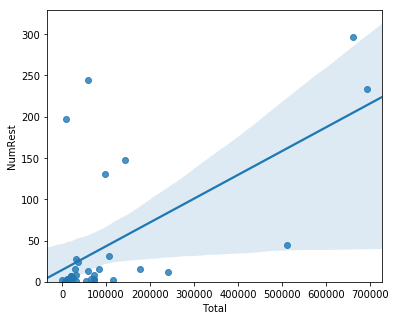

In [34]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x='Total', y='NumRest', data=df_country30)
plt.ylim(0,)

Calculate again the correlation for undeveloped countries after deleting the exceptions.

In [35]:
lista2=['Mexico','Thaila','Filipi','Lebano','Pakist','Persia']
cond5=(df_country30['NewCountry'].isin(lista2))
df_country300=df_country30.drop(df_country30[cond5].index)

X = df_country300[['Total']]
Y = df_country300[['NumRest']]

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:15]
print ('\n{} DEVELOPING countries with restaurants in {}. After deleting exception: '.format(df_country300.shape[0],city_input))
print (lista2)
print ('Correlation between inmigrants and num. of restaurants:\n',df_country300[['Total','NumRest']].corr())
print('Interept:',lm.intercept_,'Coeficiente:',lm.coef_)


27 DEVELOPING countries with restaurants in Toronto. After deleting exception: 
['Mexico', 'Thaila', 'Filipi', 'Lebano', 'Pakist', 'Persia']
Correlation between inmigrants and num. of restaurants:
             Total   NumRest
Total    1.000000  0.916661
NumRest  0.916661  1.000000
Interept: [-0.05498725] Coeficiente: [[0.00040129]]


Regplot for the undeveloped countries after deleting the exceptions (6 countries)

(0, 641.3893284337415)

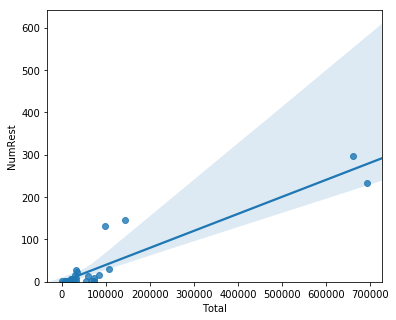

In [36]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x='Total', y='NumRest', data=df_country300)
plt.ylim(0,)

#### 3.7.2 Analyze correlation between inmigration and country restaurants (using data of  inmigrants living in Canada en 2019


We repeat the correlation process, but instead of using the accumulated list of immigrants entered between 1980 and 2012, we use the figures of immigrants existing in 2019 in Canada (source:https://datosmacro.expansion.com/demografia/migracion/inmigracion/canada) 


Taking into account that Toronto has 31% of all immigrants from Canada, it may be a good assumption that the distribution of immigrants from Canada basically coincides with that of Toronto, especially for undeveloped countries, which is where there seems to be some correlation between immigration and national restaurants

In [37]:
dict0={'India':712050,'China':691489,'Filipinas':626569,'English':531584,'Americ':270217,'Italia':252025,'HongKong':222529,'Pakistan':215409,'VietNam':180258,'Persia':164463,'Polish':155996,'German':155330,'Portugal':148513,'Dumpli':147342,'SriLanka':140579,'Korea':131324,'French':112435,'Cajun':99564,'Rumania':96183,'Lebano':94516,'Dutch':94229,'Guyana':93382,'Mexico':85825,'Russia':83802,'Ukrania':77779,'Colombia':74595,'Morocco':74184,'Iraq':72939,'Trinidad y Tobago':69264,'Egypt':68822}
print (dict0)

{'India': 712050, 'China': 691489, 'Filipinas': 626569, 'English': 531584, 'Americ': 270217, 'Italia': 252025, 'HongKong': 222529, 'Pakistan': 215409, 'VietNam': 180258, 'Persia': 164463, 'Polish': 155996, 'German': 155330, 'Portugal': 148513, 'Dumpli': 147342, 'SriLanka': 140579, 'Korea': 131324, 'French': 112435, 'Cajun': 99564, 'Rumania': 96183, 'Lebano': 94516, 'Dutch': 94229, 'Guyana': 93382, 'Mexico': 85825, 'Russia': 83802, 'Ukrania': 77779, 'Colombia': 74595, 'Morocco': 74184, 'Iraq': 72939, 'Trinidad y Tobago': 69264, 'Egypt': 68822}


In [38]:
df_country4=df_country3.copy()  
df_country4['Inmig 2019']=0
cont=0
i=0

for names in dict0:
    for i in range(0,df_country4.shape[0]):
        if str(df_country4.iloc[i,4]).startswith(names[0:4]):
            cont=cont+1
            df_country4.iloc[i,6]=dict0[names]
df_country4 = df_country4.drop(df_country4[df_country4['Inmig 2019']==0].index)
df_country4.reset_index(drop=True) 
df_country4.sort_values('Inmig 2019',ascending=False,inplace=True)
print ('Total number of countries remaining: ', df_country4.shape[0])

Total number of countries remaining:  25


In [39]:
lm = LinearRegression()
lm

# correlation for all countries 
X = df_country4[['Inmig 2019']]
Y = df_country4[['NumRest']]

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:15]
print ('{} countries with restaurants in {}'.format(df_country4.shape[0],city_input))
print ('Correlation between inmigrants and nº of restaurants:\n',df_country4[['Inmig 2019','NumRest','Total']].corr())
print('Interept:',lm.intercept_,'Coeficiente:',lm.coef_)

# correlation for undeveloped countries 
cond3=df_country4['DEV']== 0
df_country40 = df_country4.loc[cond3]
df_country40
X = df_country40[['Inmig 2019']]
Y = df_country40[['NumRest']]

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:15]
print ('\n{} DEVELOPING countries with restaurants in {}'.format(df_country40.shape[0],city_input))
print ('Correlation between inmigrants and num. of restaurants:\n',df_country40[['Inmig 2019','NumRest']].corr())
print('Interept:',lm.intercept_,'Coeficiente:',lm.coef_)

# correlation for developed countries
cond4=df_country4['DEV']== 1
df_country41 = df_country4.loc[cond4]
df_country41
X = df_country41[['Inmig 2019']]
Y = df_country41[['NumRest']]

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:15]
print ('\n{} DEVELOPED countries with restaurants in {}'.format(df_country41.shape[0],city_input))
print ('Correlation between inmigrants and nº of restaurants:\n',df_country41[['Inmig 2019','NumRest']].corr())
print('Interept:',lm.intercept_,'Coeficiente:',lm.coef_)

25 countries with restaurants in Toronto
Correlation between inmigrants and nº of restaurants:
             Inmig 2019   NumRest     Total
Inmig 2019    1.000000  0.457534  0.945697
NumRest       0.457534  1.000000  0.366986
Total         0.945697  0.366986  1.000000
Interept: [22.79083195] Coeficiente: [[0.00023584]]

15 DEVELOPING countries with restaurants in Toronto
Correlation between inmigrants and num. of restaurants:
             Inmig 2019   NumRest
Inmig 2019    1.000000  0.568644
NumRest       0.568644  1.000000
Interept: [18.32378322] Coeficiente: [[0.0002536]]

10 DEVELOPED countries with restaurants in Toronto
Correlation between inmigrants and nº of restaurants:
             Inmig 2019   NumRest
Inmig 2019    1.000000  0.206966
NumRest       0.206966  1.000000
Interept: [37.78002086] Coeficiente: [[0.00015792]]


Show developing countries with exceptions. 

Mexico and Thailandia: Many restaurants with a few inmigrants

Philipines, Iran, Pakistan and Lebanon: Many inmigrants with a few restaurants

In [41]:
lista2=['Mexico','Thaila','Filipi','Lebano','Pakist','Persia']
cond5=(df_country30['NewCountry'].isin(lista2))
df_country30[cond5]

,Country,AREA,DEV,Total,NewCountry,NumRest
136,Philippines,935,0,511391,Filipi,45
130,Pakistan,935,0,241600,Pakist,12
81,Iran (Islamic Republic of),935,0,175923,Persia,15
96,Lebanon,935,0,115359,Lebano,2
112,Mexico,904,0,58712,Mexico,244
171,Thailand,935,0,9174,Thaila,197


In [42]:
lista2=['Mexico','Thaila','Filipi','Lebano','Pakist','Persia']
cond5=(df_country40['NewCountry'].isin(lista2))
df_country400=df_country40.drop(df_country40[cond5].index)

X = df_country400[['Inmig 2019']]
Y = df_country400[['NumRest']]

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:15]
print ('\n{} DEVELOPING countries with restaurants in {}. After deleting exception: '.format(df_country400.shape[0],city_input))
print (lista2)
print ('Correlation between inmigrants and num. of restaurants:\n',df_country400[['Inmig 2019','NumRest']].corr())
print('Interept:',lm.intercept_,'Coeficiente:',lm.coef_)


10 DEVELOPING countries with restaurants in Toronto. After deleting exception: 
['Mexico', 'Thaila', 'Filipi', 'Lebano', 'Pakist', 'Persia']
Correlation between inmigrants and num. of restaurants:
             Inmig 2019   NumRest
Inmig 2019    1.000000  0.872974
NumRest       0.872974  1.000000
Interept: [-5.29220666] Coeficiente: [[0.00038296]]


## 4. RESULTS. 


The outputs of the project are:

1- Dataframe with all the ‘venues’ categories used by Foursquare with their Id and level; as well as the Id and name of all their ancestors. In total, 943 venues categories were detected, of which 349 are from the Food subcategory and of these 68 (along with all their descendants), they have been able to match country names.
 
2- Tool that allows:
- To choose for a city its limits and a reasonable radius for Foursquare searches (approx. 1000-1500m) so that the number of restaurants in that area does NOT exceed too often the limit of 50 (you come by search).
- Visualize the restaurants of which country predominate in each area
- Distribution of the restaurants of the chosen country in that city.

3- Correlation between immigrants from Canada and national restaurants open in Toronto.
This point has been repeated with two different types of data:

- Immigrants arriving in Canada between 1980-2013 (Dataset 1)

- Immigrants living in Canada in 2019  (Dataset 2) 


Firstly, it has been seen that the correlation between these two data is very high (greater than 0.9), which is normal.
Second, the correlations obtained with the number of restaurants in the countries are very similar with both types of data.

ASSUMPTION: Taking into account that Toronto has 31% of all immigrants from Canada, it may be an acceptable assumption that the distribution of immigrants to Canada basically coincides with that to Toronto, especially for developing countries, which is where there seems to be some correlation between immigration and national restaurants.


**Recommendations:**

To Foursquare that when it detects that a client wants to search for restaurants of a nationality,entring p.e:'Italian', 'Italian food', 'Italian Restarant' or similar instead of just looking for the this words in the names of the Venues, he would translate that country name into the category corresponding to the cuisine of this country and you will find restaurants that belong to that specific category or one of its daughters (those that are in lower levels). Basically that is what I did using the dataframe described in point 1 of the results.



## 5. CONCLUSIONS:

There is NO correlation in Toronto between the number of immigrants living in the city and the number of restaurants of that nationality.

However, if we split inmigrants between those who come from developing and developed countries, results are more interesting.

**a- DEVELOPING COUNTRIES:**

**There is a correlation, although not too strong, around 0.6, (-0.57 with dataset 2 and 0.61 with dataset 1), between the number of immigrants living in the city and the number of restaurants of that nationality, but ONLY for developing countries and NOT for developed countries.**


Even within the first group there are important exceptions in both directions:
- There are countries with a very high number of immigrants and very few restaurants (Philipines, Pakistan and Iran). Explanation: In the case of Pakistan, since the cuisine is similar to Indian, of which there are many restaurants, it may not be well classified on Foursquare to assign to India restaurants that could be from Pakistan. Regarding Iran, some of its restaurants may be in the Arab food category; But even so, it seems that the cuisine of Iran and Philipines is not according to the number of immigrants from these countries.
- There are countries with a very high number of restaurants and very few immigrants (Mexico, Thailand). The reason may be that both have very famous cuisines worldwide and that this phenomenon is repeated in other cities where immigration from Mexico and Thailand is also low.

If we repeat the analysis without these 5 countries from the two previous points, the correlation shoots up to 0.9.


**b- DEVELOPED COUNTRIES:**

There is no correlation between the number of emigrants and the number of restaurants.
Among the developed countries the attention is drawn to the number of Japanese and Italian restaurants and the almost absence of English, which is highly correlated with the culture and culinary tradition of these countries.

A possible general explanation between the division between both types of countries is that for inmigrants from developing countries, setting up a restaurant can become their vital business in many cases; something that immigrants from developed countries do not.

Additionally, **immigrants set up the restaurant preferably near their homes**. 

The high density of restaurants of their countries partially matches with their residential areas. (p.e: In Toronto: Italians in little Italy, Chinese in Chinatown, Greeks in Little Greek and Portuguese in small Portugal).

Personally, I was unaware of the existence of these neighborhoods in Toronto and when I saw the agglomeration of Greek or Portuguese restaurants it caught my attention and I saw that those neighborhoods did indeed exist in downtown Toronto.


Japan is an exception to this; well, not only in Toronto but in other cities. There are many restaurants of this country throughout the city, however the population does not seem to be concentrated in specific neighborhoods such as people from China or India.

Another possible study could be to analyze the correlation between the GDP of a country and the concentration of immigrants from that country in cities. The hypothesis to validate would be: The higher the GDP of a country, its immigrants live less concentrated in one area of the city. An additional variable to consider would be the level of security in the city; Well, in the case of low security, perhaps the hypothesis is not correct and/or  should be added as a new variable to analyze the correlation.
